<AxesSubplot: >

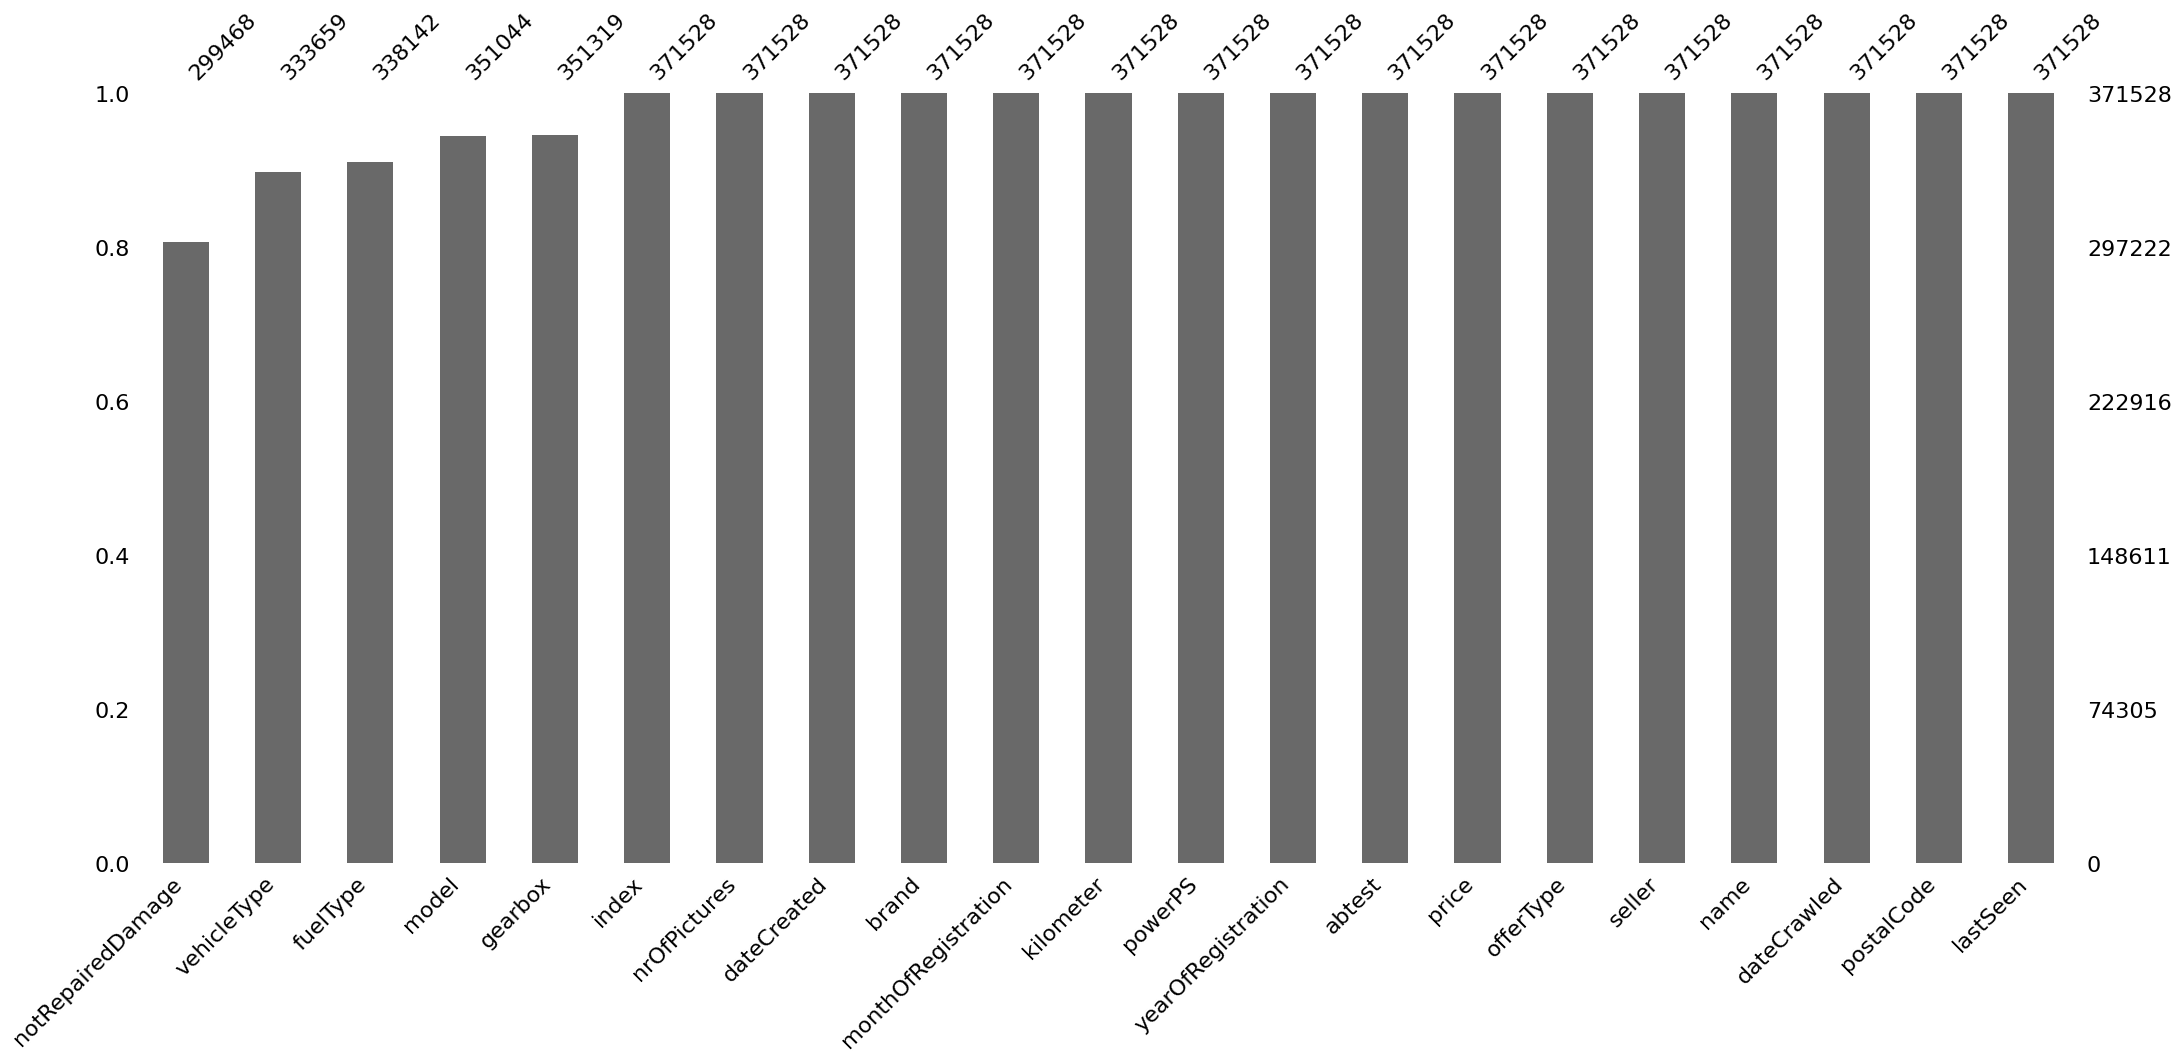

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics, preprocessing
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from kneed import KneeLocator

data = pd.read_csv('autos.csv')

msno.bar(data, sort='ascending')

<AxesSubplot: >

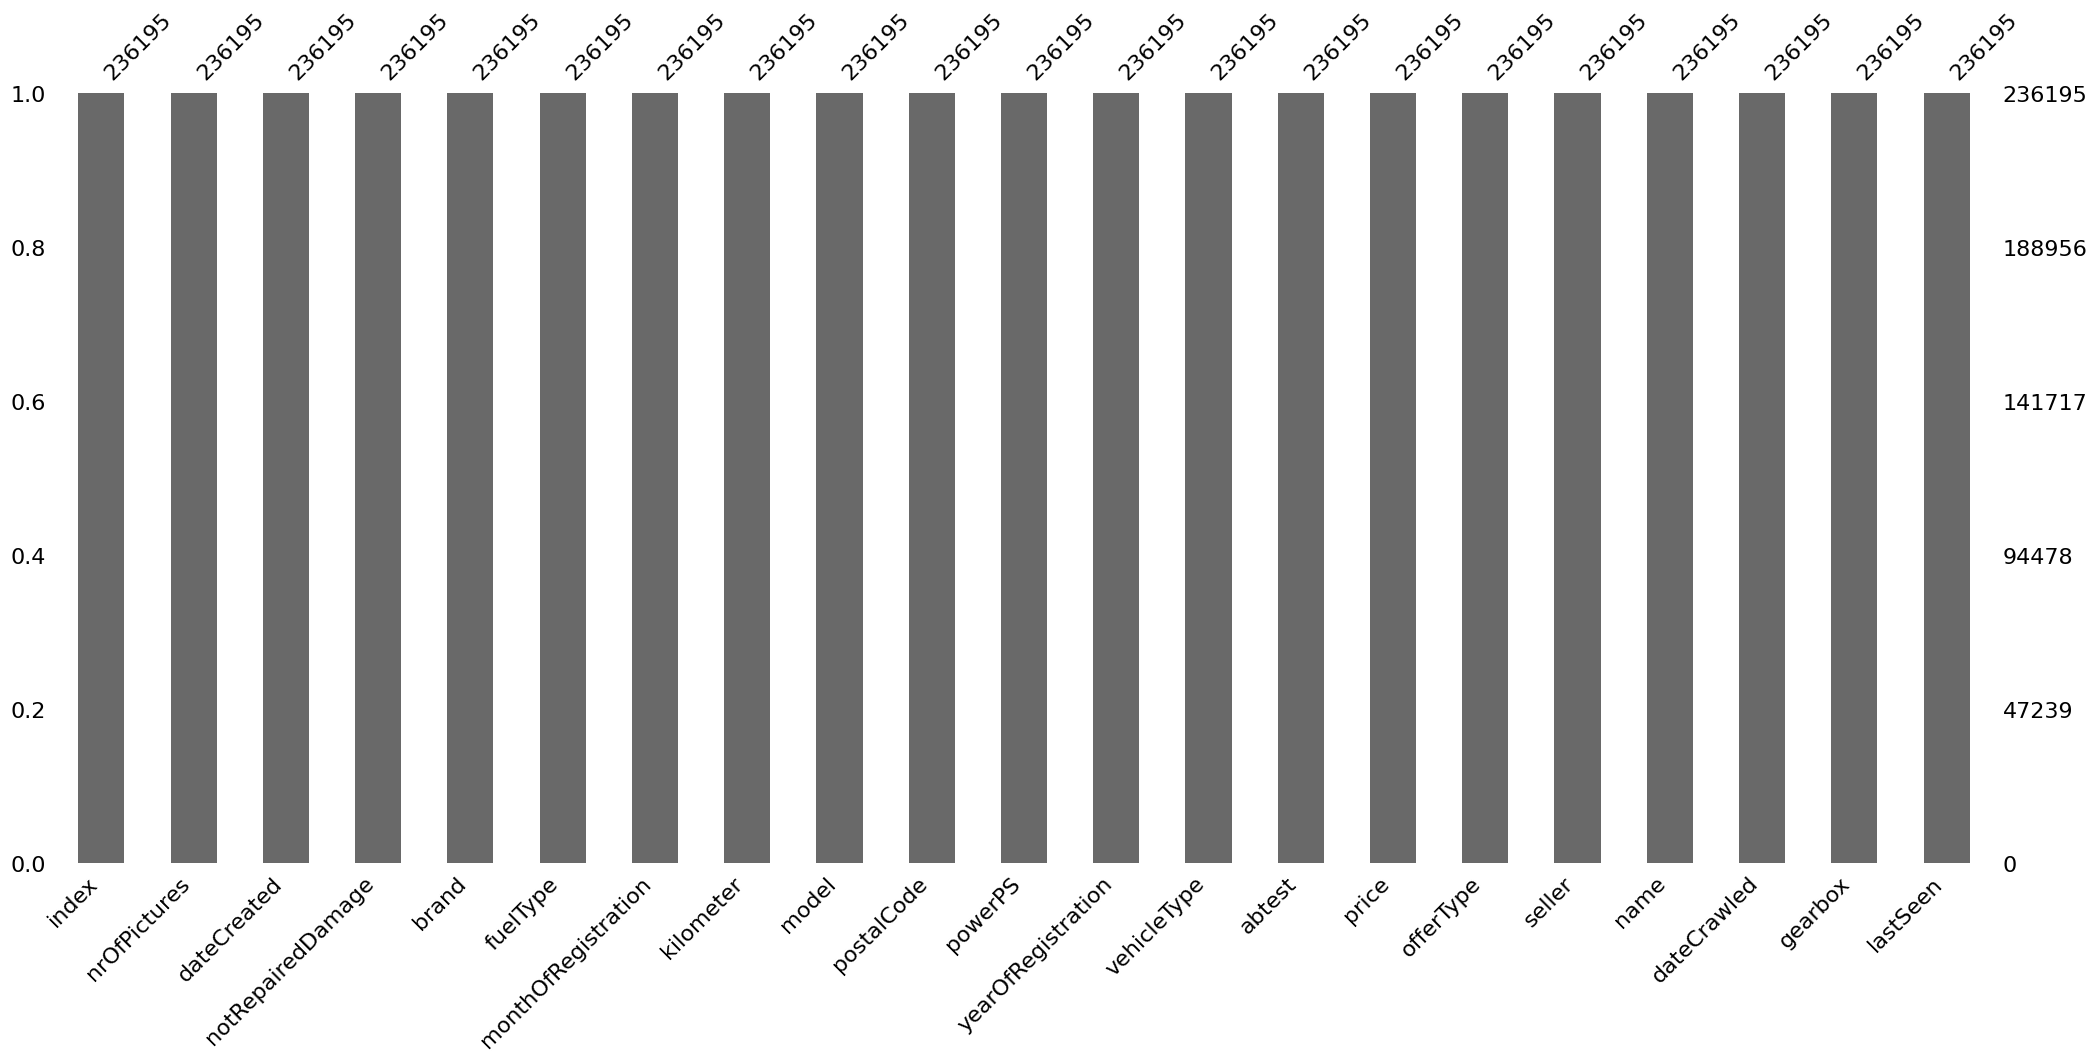

In [108]:
def outlier(value):
    Q1 = np.percentile(data[value], 25)
    Q3 = np.percentile(data[value], 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    data[data[value] > upper] = np.nan
    data[data[value] < lower] = np.nan

for i in data.select_dtypes(exclude=object).columns:
    outlier(i)

data.select_dtypes(exclude=object).fillna(data.select_dtypes(exclude=object).mean(), inplace=True)

data.dropna(inplace=True)

msno.bar(data, sort='ascending')

In [109]:
print("Actual data :")

data.offerType = pd.factorize(data.offerType)[0]
data.notRepairedDamage = pd.factorize(data.notRepairedDamage)[0]
data.seller = pd.factorize(data.seller)[0]
data.abtest = pd.factorize(data.abtest)[0]
data.gearbox = pd.factorize(data.gearbox)[0]

data.insert(0, 'vehicleType', data.pop('vehicleType'))
data.head()

data = pd.get_dummies(data, 'fuelType', '.', columns=["fuelType"])
data = pd.get_dummies(data, 'brand', '.', columns=["brand"])


#print(data)

data.drop(columns=['index', 'name','dateCrawled', 'dateCreated', 'nrOfPictures', 'lastSeen', 'monthOfRegistration', 'postalCode', 'notRepairedDamage', 'yearOfRegistration', 'vehicleType', 'abtest', 'offerType', 'seller'], inplace=True)
print(data)
data.corr().style.background_gradient('Blues')

Actual data :
         price  gearbox  powerPS        model  kilometer  fuelType.andere  \
3       1500.0        0     75.0         golf   150000.0                0   
4       3600.0        0     69.0        fabia    90000.0                0   
5        650.0        0    102.0          3er   150000.0                0   
6       2200.0        0    109.0      2_reihe   150000.0                0   
7          0.0        0     50.0       andere    40000.0                0   
...        ...      ...      ...          ...        ...              ...   
371518  3999.0        0      3.0          3er   150000.0                0   
371520  3200.0        0    225.0         leon   150000.0                0   
371521  1150.0        0      0.0       zafira   150000.0                0   
371524  1199.0        1    101.0       fortwo   125000.0                0   
371525  9200.0        0    102.0  transporter   150000.0                0   

        fuelType.benzin  fuelType.cng  fuelType.diesel  fuelT

C:\Users\admin\AppData\Local\Temp\ipykernel_10300\3038388535.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient('Blues')


,price,gearbox,powerPS,kilometer,fuelType.andere,fuelType.benzin,fuelType.cng,fuelType.diesel,fuelType.elektro,fuelType.hybrid,fuelType.lpg,brand.alfa_romeo,brand.audi,brand.bmw,brand.chevrolet,brand.chrysler,brand.citroen,brand.dacia,brand.daewoo,brand.daihatsu,brand.fiat,brand.ford,brand.honda,brand.hyundai,brand.jaguar,brand.jeep,brand.kia,brand.lada,brand.lancia,brand.land_rover,brand.mazda,brand.mercedes_benz,brand.mini,brand.mitsubishi,brand.nissan,brand.opel,brand.peugeot,brand.porsche,brand.renault,brand.rover,brand.saab,brand.seat,brand.skoda,brand.smart,brand.subaru,brand.suzuki,brand.toyota,brand.trabant,brand.volkswagen,brand.volvo
price,1.000000,0.219876,0.180794,-0.357906,-0.008236,-0.275701,0.000990,0.283121,0.007490,0.028711,-0.016585,-0.013403,0.122105,0.133524,0.016108,-0.010622,-0.025671,0.019195,-0.032859,-0.030228,-0.061710,-0.079505,-0.011842,0.017031,0.015523,0.023693,0.004032,-0.006788,-0.018381,0.030153,-0.020281,0.083443,0.097700,-0.032875,-0.009720,-0.132481,-0.054603,0.064287,-0.112131,-0.025138,-0.009044,-0.010294,0.045224,-0.021038,-0.009312,-0.005444,0.006245,-0.016327,0.007629,-0.008428
gearbox,0.219876,1.000000,0.150884,0.037779,0.001840,-0.145031,-0.015129,0.130711,0.021300,0.040468,0.055074,-0.028285,0.082040,0.093652,0.023306,0.055328,-0.022869,-0.027194,-0.012251,-0.011703,-0.072289,-0.086725,-0.016322,-0.025615,0.056022,0.053196,-0.001378,-0.011898,-0.009020,0.019966,-0.046831,0.270554,-0.037366,-0.013849,-0.023600,-0.082083,-0.062481,0.023651,-0.068697,-0.006675,0.003011,-0.057655,-0.032438,0.189460,-0.002367,-0.023483,-0.023946,-0.014108,-0.092103,0.025583
powerPS,0.180794,0.150884,1.000000,0.046787,-0.002716,-0.079634,-0.005008,0.074031,-0.003804,-0.004597,0.028604,0.023925,0.084223,0.113262,0.005964,0.017304,-0.018478,-0.012663,-0.010937,-0.017607,-0.045412,-0.031142,-0.003403,-0.008863,0.026885,0.016920,-0.003880,-0.008110,-0.005265,0.006596,-0.001900,0.077848,0.002525,-0.003805,-0.016253,-0.048410,-0.027224,0.037299,-0.047906,-0.002485,0.012431,-0.021978,-0.014638,-0.046440,0.004617,-0.018106,-0.010823,-0.020087,-0.056362,0.019256
kilometer,-0.357906,0.037779,0.046787,1.000000,-0.015484,-0.186157,-0.000201,0.179002,-0.030045,-0.029526,0.048708,0.003640,0.080375,0.102405,-0.054670,0.012375,-0.032360,-0.066396,-0.005220,-0.016234,-0.067924,-0.028018,-0.008941,-0.072835,0.007343,0.007850,-0.041435,-0.039997,-0.004169,0.013085,-0.008162,0.079965,-0.076395,-0.005303,-0.026558,-0.002962,-0.029213,0.001290,-0.015377,0.005161,0.016998,-0.031342,-0.047854,-0.109052,0.000169,-0.053752,-0.035930,-0.061828,0.038570,0.036264
fuelType.andere,-0.008236,0.001840,-0.002716,-0.015484,1.000000,-0.024747,-0.000759,-0.011619,-0.000247,-0.000450,-0.002238,-0.001454,-0.003506,-0.003671,0.002133,-0.001128,-0.002165,-0.000958,0.005815,0.004396,-0.001355,0.002832,0.003903,0.000477,-0.000671,-0.000768,-0.001514,-0.000431,-0.000626,-0.000674,-0.000325,-0.002248,0.000672,0.001058,0.002024,-0.002966,-0.001820,-0.000725,-0.001668,-0.000572,-0.000720,-0.002495,-0.002340,-0.002077,-0.000810,0.001456,-0.002140,0.203857,-0.004774,0.003150
fuelType.benzin,-0.275701,-0.145031,-0.079634,-0.186157,-0.024747,1.000000,-0.062489,-0.956205,-0.020346,-0.037040,-0.184165,0.002095,-0.092797,-0.035569,0.008631,-0.008948,-0.009201,0.001435,0.021714,0.031185,0.049436,0.009242,0.038843,0.010138,0.001923,-0.014651,-0.014855,0.009453,0.009276,-0.035243,0.032562,-0.076578,0.052891,0.025067,0.020692,0.084370,0.033290,0.026053,0.053915,0.014109,0.010867,0.012381,-0.014410,0.036082,0.021704,0.035832,0.016635,0.013414,-0.058253,-0.013837
fuelType.cng,0.000990,-0.015129,-0.005008,-0.000201,-0.000759,-0.062489,1.000000,-0.029339,-0.000624,-0.001136,-0.005651,-0.003673,-0.013290,-0.013671,0.002205,-0.002848,-0.001529,0.001097,-0.001655,-0.002057,0.028218,-0.009442,-0.003945,-0.003737,-0.001694,-0.001938,-0.003822,-0.001089,-0.001580,-0.001701,-0.004144,-0.008484,-0.004443,-0.002996,-0.005275,0.033268,-0.008060,-0.001830,-0.005888,-0.001445,-0

In [110]:
# label encoding
le = dict()
cols = data.select_dtypes(object)
for i in cols:
    temp = LabelEncoder()
    data[i] = temp.fit_transform(data[i])
    le.update({i:temp})

In [113]:
import seaborn as sns

nbs_of_clusters = range(1, 15)
inertias = []

"""
add lines here
"""
for nb_cluster in nbs_of_clusters:
    kmeans = KMeans(n_clusters=nb_cluster, init='k-means++', n_init=10, random_state=5).fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))

sns.lineplot(x=nbs_of_clusters, y=inertias,marker='o',color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kneedle = KneeLocator(nbs_of_clusters, inertias, S=1, curve="convex", direction="decreasing")
print(kneedle.knee)
kneedle.plot_knee()

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [85]:
print(inertias)

[306320925142635.6, 56393770189416.234, 27906338824256.87, 13796315723533.205, 7789717605705.874, 5672276596443.54, 4360418357818.034, 3382935761370.6304, 2953708134636.589, 2560122566864.1973, 2308185052361.834, 1954937432688.6184, 1684651369891.2136, 1544049540594.0676]
